# TF MNIST Dense Demo
Train Dense network on MNIST dataset.

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# Model / data / training parameters.
num_classes = 10
input_shape = (784)
batch_size = 128
epochs = 5

In [3]:
# Load the data and split it between train and test sets.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range.
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Flatten 28 * 28 images for Dense layer input.
x_train = np.reshape(x_train, (60000, 784,1))
x_test = np.reshape(x_test, (10000, 784,1))

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 784, 1)
60000 train samples
10000 test samples


In [4]:
# Define sequential Keras model.
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Compile and train model.
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate model.
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Plot 9 predictions.
def plot_mnist_image(images, label_true, label_predict, img_shape=(28, 28)):
    """
    Plot 9 images and their labels.
    based on: https://tensorflowguide.readthedocs.io/en/latest/tensorflow/mnist.html
    """
    fig, axes = plt.subplots(3, 3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted labels.
        if label_predict is None:
            xlabel = f"True: {label_true[i]}"
        else:
            xlabel = f"True: {label_true[i]}, Pred: {label_predict[i]}"
        
        ax.set_xlabel(xlabel)
        # Disable ticks.
        ax.set_xticks([])
        ax.set_yticks([])
    fig.tight_layout() 
    plt.show()

# Store model.
def save_tf_model(model, name):
    # Save model and weights in h5 format.
    model.save(f'{name}.h5', save_format='h5')
    
    # Save weights only in h5 format.
    model.save_weights(f'{name}_weights.h5')

    # Save model in TensorFlow SavedModel format
    model.save(f'{name}')

    # Save model architecture as json
    json = model.to_json()
    json_file = open(f"{name}_architecture.json", "w")
    json_file.write(json)
    json_file.close()
    


Epoch 1/5
422/422 [==============================] - 3s 4ms/step - loss: 0.6027 - accuracy: 0.8238 - val_loss: 0.2318 - val_accuracy: 0.9353
Epoch 2/5
422/422 [==============================] - 1s 3ms/step - loss: 0.2487 - accuracy: 0.9290 - val_loss: 0.1761 - val_accuracy: 0.9515
Epoch 3/5
422/422 [==============================] - 1s 3ms/step - loss: 0.1980 - accuracy: 0.9430 - val_loss: 0.1567 - val_accuracy: 0.9583
Epoch 4/5
422/422 [==============================] - 1s 3ms/step - loss: 0.1710 - accuracy: 0.9498 - val_loss: 0.1398 - val_accuracy: 0.9613
Epoch 5/5
422/422 [==============================] - 1s 3ms/step - loss: 0.1528 - accuracy: 0.9546 - val_loss: 0.1318 - val_accuracy: 0.9633
Test loss: 0.15710169076919556
Test accuracy: 0.9544000029563904


1/1 [==============================] - 0s 110ms/step


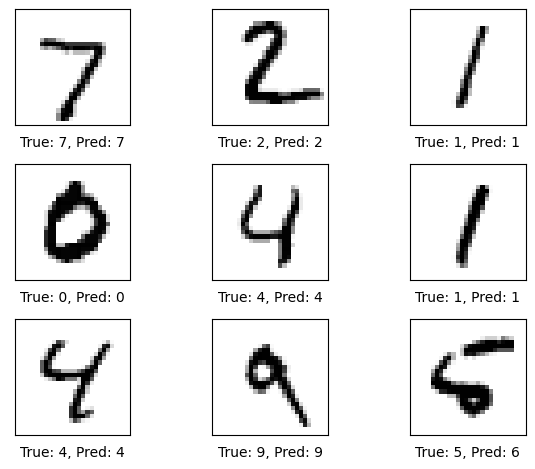

In [6]:
preds = model.predict(x_test[0:9])
plot_mnist_image(x_test[0:9], y_test[0:9].argmax(axis=1), preds.argmax(axis=1))

In [7]:
save_tf_model(model, "mnist-dense")

INFO:tensorflow:Assets written to: mnist-dense\assets


INFO:tensorflow:Assets written to: mnist-dense\assets
